In [6]:
import zipfile, os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Extract files
local_zip =('/content/drive/MyDrive/rockpaperscissors classification/rockpaperscissors.zip')
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir='/tmp/rockpaperscissors/rps-cv-images'

#check directori
os.listdir(base_dir)

['scissors', 'rock', 'paper', 'README_rpc-cv-images.txt']

In [5]:
#augmentation 
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split=0.2
)

In [7]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size =(150,150),
    shuffle = True,
    class_mode ='categorical',
    batch_size = 32,
    subset ='training'
)
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size =(150,150),
    class_mode ='categorical',
    batch_size = 32,
    subset='validation'
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [8]:
#model
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax') #karena 3 class
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [10]:
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(), 
              metrics =['accuracy'])


In [11]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', patience=3),
]

In [12]:
fitting = model.fit(
    train_generator,
    epochs = 20,
    validation_data = validation_generator,
    verbose = 2,
    callbacks=my_callbacks
)

Epoch 1/20
55/55 - 123s - loss: 0.8558 - accuracy: 0.5894 - val_loss: 0.4176 - val_accuracy: 0.8513 - 123s/epoch - 2s/step
Epoch 2/20
55/55 - 118s - loss: 0.3190 - accuracy: 0.8943 - val_loss: 0.3501 - val_accuracy: 0.8696 - 118s/epoch - 2s/step
Epoch 3/20
55/55 - 118s - loss: 0.2396 - accuracy: 0.9092 - val_loss: 0.1896 - val_accuracy: 0.9336 - 118s/epoch - 2s/step
Epoch 4/20
55/55 - 119s - loss: 0.2105 - accuracy: 0.9275 - val_loss: 0.1556 - val_accuracy: 0.9474 - 119s/epoch - 2s/step
Epoch 5/20
55/55 - 119s - loss: 0.1650 - accuracy: 0.9400 - val_loss: 0.1215 - val_accuracy: 0.9634 - 119s/epoch - 2s/step
Epoch 6/20
55/55 - 120s - loss: 0.1504 - accuracy: 0.9475 - val_loss: 0.0978 - val_accuracy: 0.9725 - 120s/epoch - 2s/step
Epoch 7/20
55/55 - 119s - loss: 0.1113 - accuracy: 0.9652 - val_loss: 0.1295 - val_accuracy: 0.9542 - 119s/epoch - 2s/step
Epoch 8/20
55/55 - 119s - loss: 0.1006 - accuracy: 0.9657 - val_loss: 0.0883 - val_accuracy: 0.9611 - 119s/epoch - 2s/step
Epoch 9/20
55/55

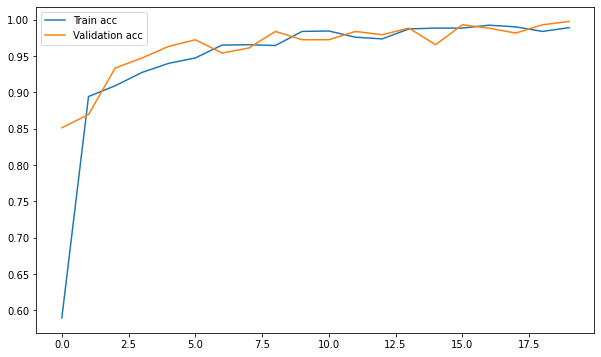

In [22]:
plt.figure(figsize=[10,6])
plt.plot(fitting.history["accuracy"], label = "Train acc")
plt.plot(fitting.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

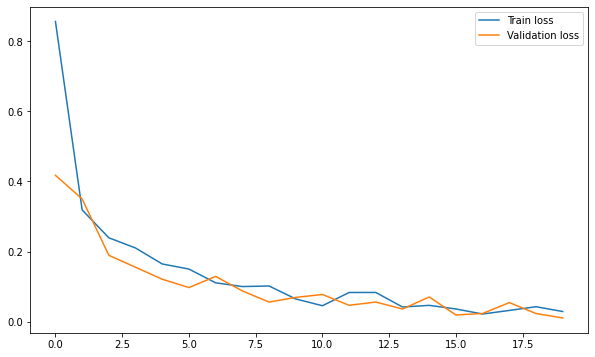

In [23]:
plt.figure(figsize=(10,6))
plt.plot(fitting.history['loss'], label = "Train loss")
plt.plot(fitting.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

Please upload a photo when the object is in a horizontal position


Saving gunting.png to gunting.png
gunting.png
scissors
by Rahma Hayuning Astuti, 2021


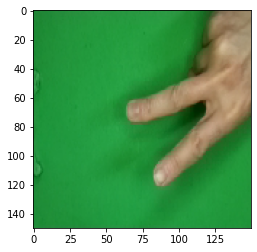

In [21]:
# Testing
print('Please upload a photo when the object is in a horizontal position')
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]== 1:
    print('rock')
  else:
    print('scissors')
print('by Rahma Hayuning Astuti, 2021')